<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_spring_2023/blob/main/projects/Phys_2320_project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Even though Jorginho is a party animal who has trouble being disciplined enough to follow the program that your company Physics Physical LLC has designed for him, you decide to stick with him since he is your only client. 

[Global Positioning System (GPS)](https://en.wikipedia.org/wiki/Global_Positioning_System) is an amazing technology that provides time and geolocation to GPS receiver devices anywhere on earth. It was designed by the US Department of Defense in the 1970s and is currently maintained and operated by the US Space Force courtesy of your taxes. The system is so accurate that Einstein's relativity comes into place. It is offered 'for free' by the [US Government](https://www.gps.gov) to any and all GPS receivers, other countries are now competing to provide this service 'for free' as well. Your cell phone is a GPS receiver, and the data it generates is transmitted to Google, Apple, Facebook, and many other harmless companies. Although the data is a bit scrambled, in principle the US government can also get the location of your cell phone and according to [GPS.gov](https://www.gps.gov/policy/privacy/), "it remains unclear whether the extended use of GPS technology to track suspects without a warrant violates their Fourth Amendment rights."

Anyways, Physics Physical LLC uses GPS for positive things only. You put a [Garmin Forerunner 35](https://www.garmin.com/en-US/p/552962/pn/010-01689-01) watch on Jorginho and make him run the 5k route he is preparing for. Having some experience with the route always helps. 

If you are interested in looking at the raw data, it is [here](https://raw.githubusercontent.com/jamunozlab/introductory_mechanics_fall_2022/main/projects/activity_9630873201.tcx). In any case, evaluate the following cells so that you can manipulate the data in this Notebook. 

In [ ]:
# Packages to make our life easy
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
#pd.options.plotting.backend = "plotly"

In [ ]:
# This puts the raw data in 'response'
url = "https://raw.githubusercontent.com/jamunozlab/introductory_mechanics_fall_2022/main/projects/activity_9630873201.tcx"
response = requests.get(url)

In [ ]:
# This gathers the part of the data you are interested in: position and time
Bs_data = BeautifulSoup(response.content, "xml")
latitude_list = Bs_data.find_all('LatitudeDegrees')
longitude_list = Bs_data.find_all('LongitudeDegrees')
timestep_list = range(len(latitude_list))

In [ ]:
# This puts the data in a pandas dataframe that is easy to manipulate
df_dict = {}
df_dict['latitude'] = pd.Series([float(latitude.contents[0]) for latitude in latitude_list])
df_dict['longitude'] = pd.Series([float(longitude.contents[0]) for longitude in longitude_list])
df_dict['timestep'] = pd.Series(timestep_list)
df = pd.DataFrame(df_dict)

In [ ]:
# This shows you some of the first and some of the last rows of your dataframe
# Notice that the position is given in latitude and longitude,
# that the position is reported every second, 
# and that the run lasted 1666 seconds (a bit less than 28 minutes)
df

In [ ]:
# This plots the position on the horizontal and vertical axes
# The color is the time in seconds (red is 1600 s, green 800 s, etc.)
df.plot(kind='scatter', x='longitude', y='latitude', c='timestep', cmap='nipy_spectral', figsize=(9, 8), ylabel = "latitude (degrees)",)

In [ ]:
# By comparing your plot to the map below, you can see that Jorginho was 
# close to Centennial Plaza at 0 seconds (where he started) 
# and in front of the Library at about 100 seconds
# and that he messed up the route and went around the Sun Bowl

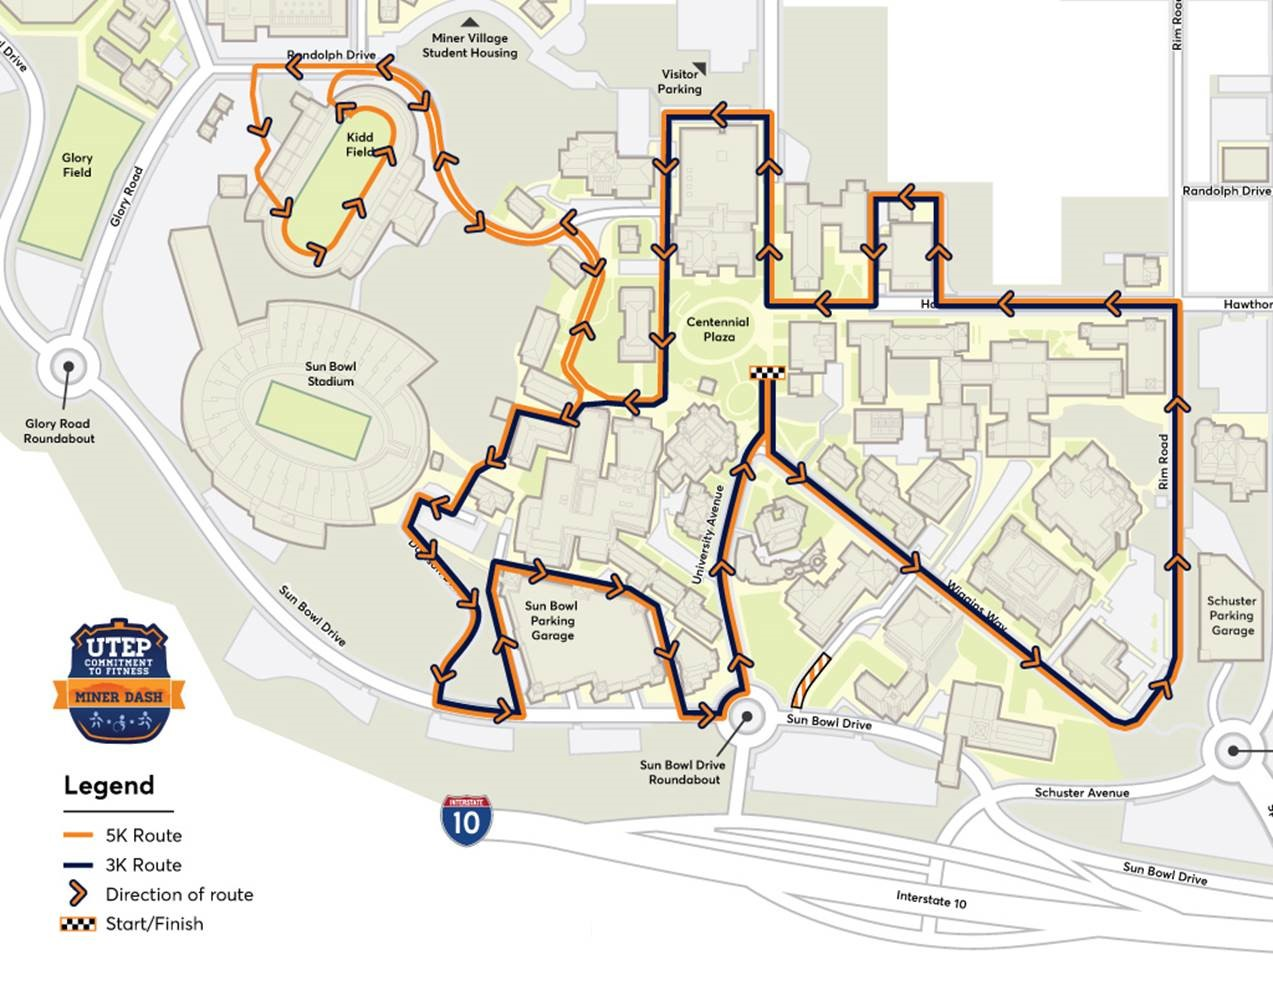

The definition of displacement is final position minus initial position. In the two dimensions $x$ and $y$, the displacement is:

$\Delta \vec{r} = \Delta \vec{x} + \Delta \vec{y} = (x_f - x_0) \hat{i} + (y_f - y_0) \hat{j}$

where $\hat{i}$ and $\hat{j}$ are the unitary vectors along $x$ and $y$ respectively. Since $\hat{i}$ and $\hat{j}$ are orthongal ($90^{\rm o}$ angle between them), they form a [right triangle](https://en.wikipedia.org/wiki/Right_triangle) in which the hypotenuse is the magnitude of $\Delta \vec{r}$. Applying the Pythagorean theorem, 

$|\Delta \vec{r}| = \sqrt{(x_f - x_0)^2 + (y_f - y_0)^2}$ .

Notice that this is only the magnitude of the displacement, there is no information about the direction. The magnitude of the displacement is called the *distance* between the two points $(x_f, y_f)$ and $(x_0, y_0)$.

In [ ]:
# This gives you the latitude of Jorginho (in degrees) at time t = 0 seconds
df.latitude.iloc[0]

In [ ]:
# This gives you the latitude of Jorginho (in degrees) at time t = 1000 seconds
df.latitude.iloc[1000]

In [ ]:
# This gives you the longitude of Jorginho (in degrees) at time t = 0 seconds
df.longitude.iloc[0]

In [ ]:
# This gives you the longitude of Jorginho (in degrees) at time t = 1000 seconds
df.longitude.iloc[1000]

In [ ]:
# This gives you the displacement in latitude between 1000 s and 0 s
df.latitude.iloc[1000] - df.latitude.iloc[0]

In [ ]:
# This gives you the displacement in latitude between 1000 s and 0 s
df.longitude.iloc[1000] - df.longitude.iloc[0]

In [ ]:
# The distance (in degrees) between the points at 1000 s and 0 s is "c"
a = df.longitude.iloc[1000] - df.longitude.iloc[0]
b = df.latitude.iloc[1000] - df.latitude.iloc[0]
c = np.sqrt(a**2 + b**2)

In [ ]:
print(c)

In [ ]:
# Based on the code above, complete the following function to
# compute the distance between points

In [ ]:
def calculate_distance_between_timesteps(timestep_f, timestep_0):
  a = 
  b = 
  c = np.sqrt(a**2 + b**2)
  return c

In [ ]:
# Looking at the plot above, Jorginho ran in front of the library at about 
# t = 100 seconds
# The distance from the starting point to the library is then 
# 0.0027940568097634347 degrees
# (Make sure your function gives this value)
calculate_distance_between_timesteps(100, 0)

In [ ]:
# Looking at the plot above, Jorginho got to Rim Rd and Hawthorn at about 
# t = 250 seconds
# The distance from the starting point to that intersection is then 
# 0.0037115921712737735 degrees
# (Make sure your function gives this value)
calculate_distance_between_timesteps(250, 0)

In [ ]:
# Looking at the plot above, Jorginho ran in front of Kidd Field at about 
# t = 1000 seconds
# The distance from the starting point to the entrance to Kidd Field is then 
# 0.004937299385271228 degrees
# (Make sure your function gives this value)
calculate_distance_between_timesteps(1000, 0)

## If the predictions of your function agree with the numbers given in the comments for the three cases above, you may continue.

OK

In [ ]:
# Notice that calculate_distance_between_timesteps() gives the actual distance
# between two points, but because Jorginho did not run in a straight line, 
# the distance Jorginho ran is greater
# Nevertheless, by computing the distance between contiguous timesteps and
# adding all those distance, we can get a good idea of the actual distance ran 
def calculate_distance_run_between_timesteps(timestep_f, timestep_0):
  total_distance = 0
  for index in range(timestep_0, timestep_f - 1):
    c = calculate_distance_between_timesteps(index + 1, index)
    total_distance = total_distance + c
  return total_distance

In [ ]:
# The total distance he ran is 0.048982316824256245 degrees
calculate_distance_run_between_timesteps(1666, 0)

Degrees is an inconvenient unit of distance. Nevertheless, since the total distance was 5 km = 5000 meters, 1 degree is

$\frac{0.048982316824256245 {\rm degrees}}{1 {\rm degree}} = \frac{5000 {\rm meters}}{u}$

$\therefore$

$u = \frac{5000 {\rm meters} \times 1 {\rm degree}}{0.048982316824256245 {\rm degrees}} = 102078 {\rm meters}$

1 degree is equal to 102078 meters

In [ ]:
# This function converts from degrees to meters
def degrees_to_meters(degrees):
  return degrees * 102078

In [ ]:
# Looking at the plot above, Jorginho ran in front of the library at about 
# t = 100 seconds
# The distance from the starting point to the library is then 
# 0.0027940568097634347 degrees
# 285 meters
degrees_to_meters(calculate_distance_between_timesteps(100, 0)) # meters

In [ ]:
# But the distance ran by Jorginho to get to the front of the library was 
# t = 100 seconds
# 309 meters
degrees_to_meters(calculate_distance_run_between_timesteps(100, 0)) # meters

In [ ]:
# Looking at the plot above, Jorginho got to Rim Rd and Hawthorn Ave. at about 
# t = 250 seconds
# The distance from the starting point to that intersection is then 
# 0.0037115921712737735 degrees
# 379 meters
degrees_to_meters(calculate_distance_between_timesteps(250, 0)) # meters

In [ ]:
# But the distance ran by Jorginho to get to Rim Rd and Hawthorn Ave. was 
# t = 250 seconds
# 825 meters
degrees_to_meters(calculate_distance_run_between_timesteps(250, 0)) # meters

## Questions

You can use the code above to help you answer the following questions. Type your answers as Python comments in the cells below.

1. What is the distance in meters between the starting point and the east side of the Union Student Building? What is the distance Jorginho ran to get there? What was Jorginho's average velocity and average speed between these two points?

2. What is the distance in meters between UGLC (on Wiggins Way) and the Glory Road Roundabout? What is the distance Jorginho ran between those to points? What was Jorginho's average velocity and average speed between these two points?

3. One of the kinematic equations gives you the position as a function of time, x(t) = x0 + v0 * t + (1/2) * a * t^2. How is this equation similar to the python function "calculate_distance_run_between_timesteps." How is it different?

4. A 'negative split' is when, during a specific run, each split time (a 'split' is a segment of a run) is shorter than the one before. On the treadmill, Jorginho does negative splits because each 1/3 of a mile is run a bit faster than the previous one. Negative splits help you end the race strong rather than get tired too early. If the splits are 1 mile (1609 meters), what were Jorginho's split times for this race? Were they negative? 

In [ ]:
### CODE FOR QUESTION 1 (As many cells as you need)

In [ ]:
### EXPLANATION FOR QUESTION 1 

In [ ]:
### CODE FOR QUESTION 2 (As many cells as you need)

In [ ]:
### EXPLANATION FOR QUESTION 2

In [ ]:
### CODE FOR QUESTION 3 (As many cells as you need)

In [ ]:
### EXPLANATION FOR QUESTION 3

In [ ]:
### CODE FOR QUESTION 4 (As many cells as you need)

In [ ]:
### EXPLANATION FOR QUESTION 4